In [2]:
import torch
import torchvision 
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F


In [3]:

dataset = MNIST(root = 'data/', download = True)
print(len(dataset))

100%|██████████| 9.91M/9.91M [00:04<00:00, 2.47MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 112kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 536kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.77MB/s]

60000


Label: 3


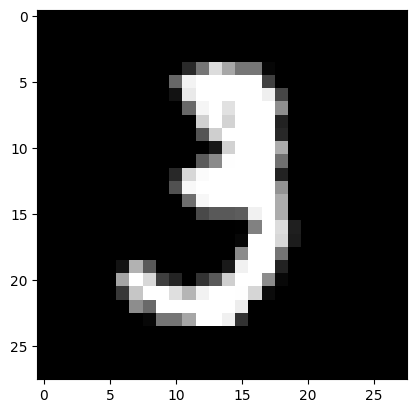

In [4]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [5]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [7]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


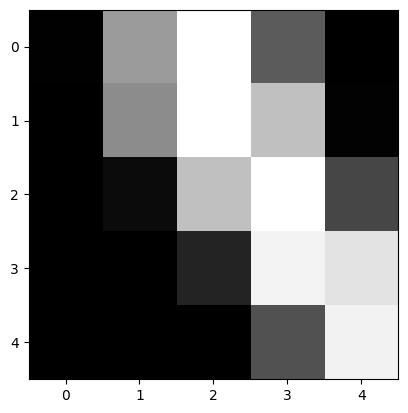

In [8]:
## Plot the image of the tensor
plt.imshow(image_tensor[0,10:15,10:15],cmap = 'gray')

In [9]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [10]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [11]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0003,  0.0088,  0.0043,  ..., -0.0062,  0.0181, -0.0194],
        [-0.0040,  0.0297, -0.0270,  ..., -0.0066,  0.0013, -0.0097],
        [ 0.0003,  0.0238, -0.0124,  ...,  0.0070,  0.0270,  0.0048],
        ...,
        [ 0.0025, -0.0284,  0.0006,  ..., -0.0156,  0.0206, -0.0337],
        [-0.0225,  0.0333,  0.0128,  ..., -0.0276,  0.0055,  0.0285],
        [ 0.0295,  0.0004, -0.0099,  ..., -0.0147,  0.0327,  0.0280]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0004, -0.0288, -0.0253, -0.0183, -0.0256,  0.0035, -0.0025,  0.0248,
         0.0133,  0.0069], requires_grad=True)


In [13]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0016, -0.0243, -0.0136,  ...,  0.0077, -0.0143, -0.0329],
         [ 0.0041, -0.0307,  0.0221,  ..., -0.0283, -0.0143,  0.0180],
         [-0.0173, -0.0148,  0.0128,  ..., -0.0073,  0.0093, -0.0171],
         ...,
         [-0.0157,  0.0249,  0.0247,  ..., -0.0223,  0.0169, -0.0030],
         [ 0.0171, -0.0356,  0.0101,  ...,  0.0325, -0.0183, -0.0109],
         [-0.0010, -0.0296,  0.0064,  ..., -0.0325,  0.0014,  0.0218]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0157,  0.0149,  0.0145, -0.0282,  0.0344, -0.0353,  0.0192, -0.0238,
         -0.0118, -0.0296], requires_grad=True)]

In [14]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-0.0649,  0.1262,  0.1096,  ..., -0.0195,  0.1368, -0.1278],
        [ 0.3311,  0.0862,  0.4942,  ...,  0.0461,  0.7081, -0.3533],
        [-0.1807, -0.0578,  0.1608,  ..., -0.0233,  0.3007,  0.0269],
        ...,
        [ 0.0126, -0.0112, -0.0314,  ...,  0.0146,  0.2214, -0.0314],
        [ 0.1077, -0.0293,  0.2524,  ..., -0.1087, -0.0218, -0.2694],
        [-0.1440, -0.0412,  0.3253,  ..., -0.1529,  0.1616, -0.2766]],
       grad_fn=<AddmmBackward0>)
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.0649,  0.1262,  0.1096,  0.0056, -0.1119,  0.1164, -0.0909, -0.0195,
          0.1368, -0.1278],
        [ 0.3311,  0.0862,  0.4942, -0.0256,  0.3880,  0.2112, -0.3570,  0.0461,
          0.7081, -0.3533]])


In [15]:
## Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.0925, 0.1120, 0.1101, 0.0993, 0.0883, 0.1109, 0.0901, 0.0968, 0.1132,
         0.0869],
        [0.1134, 0.0887, 0.1334, 0.0793, 0.1200, 0.1005, 0.0570, 0.0852, 0.1653,
         0.0572]])


Sum:  1.0


tensor([8, 8, 4, 6, 2, 2, 8, 0, 1, 4, 8, 8, 3, 4, 8, 6, 8, 4, 8, 8, 4, 8, 4, 0,
        7, 4, 8, 5, 2, 8, 8, 8, 4, 0, 4, 8, 8, 8, 4, 8, 2, 8, 4, 5, 4, 4, 8, 4,
        2, 6, 8, 8, 6, 4, 4, 0, 8, 5, 4, 6, 4, 4, 5, 8, 4, 8, 4, 4, 8, 0, 0, 8,
        8, 2, 5, 7, 8, 4, 8, 4, 8, 8, 1, 8, 7, 0, 8, 8, 0, 4, 4, 4, 8, 8, 4, 4,
        4, 5, 8, 4, 8, 2, 0, 4, 4, 4, 8, 4, 8, 2, 8, 8, 2, 4, 4, 4, 8, 2, 4, 8,
        4, 5, 4, 8, 4, 8, 2, 2])


tensor([0.1132, 0.1653, 0.1491, 0.1392, 0.1411, 0.1302, 0.1319, 0.1475, 0.1175,
        0.1420, 0.1836, 0.1325, 0.1125, 0.1485, 0.1668, 0.1296, 0.1396, 0.1416,
        0.1582, 0.1332, 0.1346, 0.1629, 0.1337, 0.1221, 0.1181, 0.1554, 0.1331,
        0.1441, 0.1508, 0.1289, 0.1459, 0.1308, 0.1253, 0.1377, 0.1220, 0.1338,
        0

In [16]:
labels

tensor([5, 8, 0, 2, 8, 2, 2, 4, 1, 3, 9, 5, 5, 2, 4, 3, 2, 6, 9, 7, 0, 7, 0, 8,
        1, 0, 8, 5, 7, 9, 8, 1, 3, 6, 7, 5, 9, 1, 0, 5, 4, 3, 3, 2, 0, 5, 5, 0,
        5, 5, 6, 8, 5, 0, 3, 5, 7, 5, 4, 0, 6, 8, 6, 4, 5, 2, 5, 4, 5, 4, 6, 8,
        1, 3, 2, 1, 7, 2, 8, 3, 7, 1, 1, 3, 1, 9, 0, 8, 8, 8, 6, 0, 5, 5, 6, 6,
        0, 5, 4, 0, 8, 2, 8, 3, 6, 3, 5, 3, 3, 8, 3, 8, 1, 7, 6, 2, 8, 4, 0, 9,
        7, 6, 6, 5, 4, 2, 8, 9])

In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.1562)


Loss Function:  <function cross_entropy at 0x7b2db152a0e0>


tensor(2.2861, grad_fn=<NllLossBackward0>)


In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})
    
    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
    
model = MnistModel()

In [19]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [20]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.298142671585083, 'val_acc': 0.11501186341047287}

In [21]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9259, val_acc: 0.6371
Epoch [1], val_loss: 1.6613, val_acc: 0.7223
Epoch [2], val_loss: 1.4641, val_acc: 0.7632
Epoch [3], val_loss: 1.3153, val_acc: 0.7839
Epoch [4], val_loss: 1.2005, val_acc: 0.7984


In [22]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1102, val_acc: 0.8072
Epoch [1], val_loss: 1.0375, val_acc: 0.8162
Epoch [2], val_loss: 0.9780, val_acc: 0.8236
Epoch [3], val_loss: 0.9284, val_acc: 0.8275
Epoch [4], val_loss: 0.8864, val_acc: 0.8301


In [23]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8504, val_acc: 0.8340
Epoch [1], val_loss: 0.8192, val_acc: 0.8380
Epoch [2], val_loss: 0.7918, val_acc: 0.8402
Epoch [3], val_loss: 0.7677, val_acc: 0.8426
Epoch [4], val_loss: 0.7461, val_acc: 0.8453


In [24]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7268, val_acc: 0.8485
Epoch [1], val_loss: 0.7094, val_acc: 0.8510
Epoch [2], val_loss: 0.6936, val_acc: 0.8530
Epoch [3], val_loss: 0.6791, val_acc: 0.8545
Epoch [4], val_loss: 0.6659, val_acc: 0.8560


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

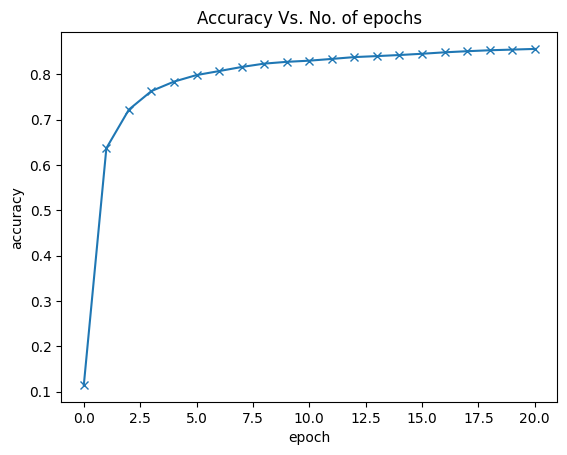

In [25]:
## Replace these values with your result
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')